# ML Model Implementation

<>:16: SyntaxWarning: invalid escape sequence '\e'
<>:16: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Piyusha\AppData\Local\Temp\ipykernel_19984\3941973045.py:16: SyntaxWarning: invalid escape sequence '\e'
  df = pd.read_csv("Dataset\eVTOL_telemetry_dataset_v3.csv")


--- Data Preparation ---
Dataset loaded with 40000 rows.
Data split into 32000 training rows and 8000 testing rows.
------------------------------

--- Training and Evaluating: Logistic Regression ---
Accuracy: 0.8698

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      4000
           1       0.93      0.80      0.86      4000

    accuracy                           0.87      8000
   macro avg       0.88      0.87      0.87      8000
weighted avg       0.88      0.87      0.87      8000



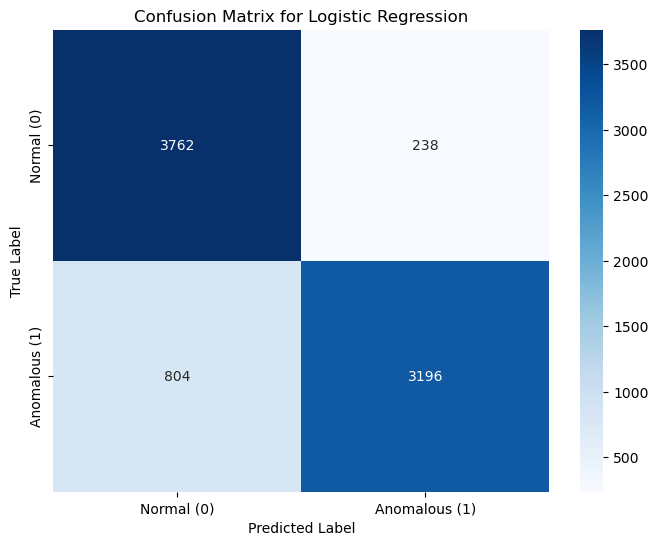


--- Training and Evaluating: Random Forest ---
Accuracy: 0.8762

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      4000
           1       0.94      0.81      0.87      4000

    accuracy                           0.88      8000
   macro avg       0.88      0.88      0.88      8000
weighted avg       0.88      0.88      0.88      8000



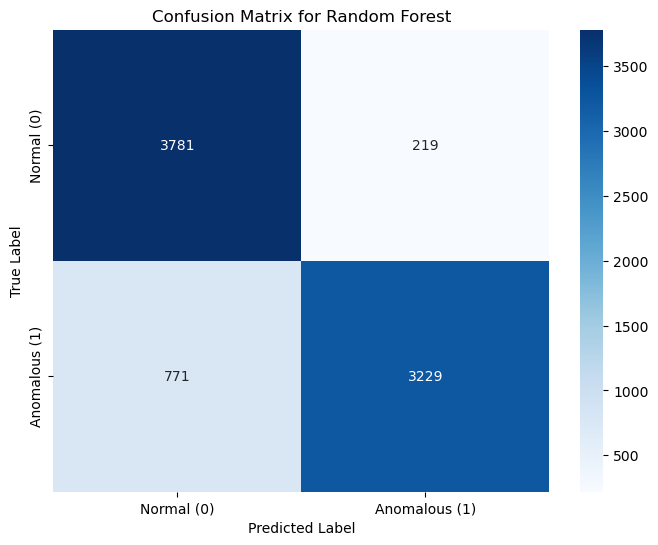


--- Training and Evaluating: LightGBM ---
[LightGBM] [Info] Number of positive: 16000, number of negative: 16000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.8822

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4000
           1       0.97      0.79      0.87      4000

    accuracy                           0.88      8000
   macro avg       0.90      0.88      0.88      8000
weighted avg       0.90      0.88      0.88      8000



c:\Users\Piyusha\anaconda3\envs\global-suicide-eda\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Piyusha\anaconda3\envs\global-suicide-eda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Piyusha\anaconda3\envs\global-suicide-eda\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Piyusha\anaconda3\envs\global-suicide-eda\Lib\subprocess.py", line 1028, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\P

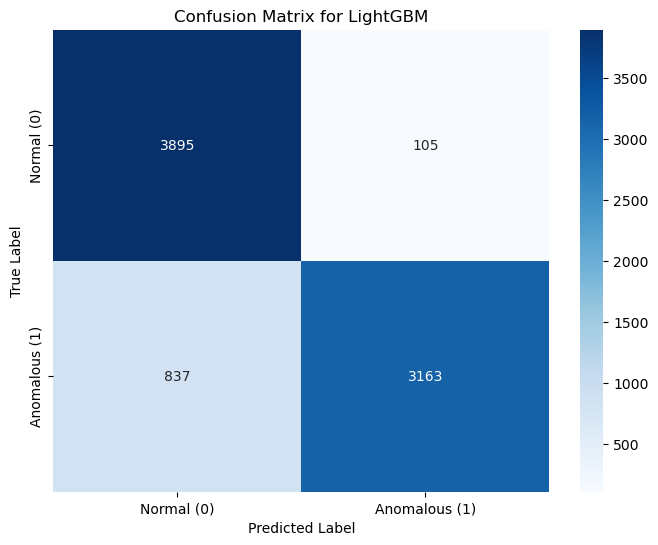


           MODEL COMPARISON SUMMARY

Model: Logistic Regression
  Overall Accuracy: 0.8698
  Anomalous Recall: 0.7990  <-- How many anomalies we found
  Anomalous F1-Score: 0.8598  <-- Balanced score

Model: Random Forest
  Overall Accuracy: 0.8762
  Anomalous Recall: 0.8073  <-- How many anomalies we found
  Anomalous F1-Score: 0.8671  <-- Balanced score

Model: LightGBM
  Overall Accuracy: 0.8822
  Anomalous Recall: 0.7907  <-- How many anomalies we found
  Anomalous F1-Score: 0.8704  <-- Balanced score



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- 1. Load and Prepare the Data ---
try:
    df = pd.read_csv("Dataset\eVTOL_telemetry_dataset_v3.csv")
except FileNotFoundError:
    print("Error: eVTOL_telemetry_dataset_v3.csv not found.")
    print("Please make sure the dataset file is in the same directory.")
    exit()

print("--- Data Preparation ---")
print(f"Dataset loaded with {len(df)} rows.")

# Define features (X) and target (y)
# We drop non-feature columns: Timestamp and Scenario for modeling, and the Label itself.
X = df.drop(['Timestamp', 'Scenario', 'Label'], axis=1)
y = df['Label']

# Split data into training and testing sets (80% train, 20% test)
# stratify=y ensures the proportion of normal/anomalous data is the same in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Data split into {len(X_train)} training rows and {len(X_test)} testing rows.")
print("-" * 30)

# --- 2. Define and Train Models ---

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}

results = {}

for model_name, model in models.items():
    print(f"\n--- Training and Evaluating: {model_name} ---")
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    # --- 3. Evaluate Performance ---
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    results[model_name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": cm
    }
    
    # Print the results for this model
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(report)
    
    # Plot the Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Normal (0)', 'Anomalous (1)'], 
                yticklabels=['Normal (0)', 'Anomalous (1)'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# --- 4. Compare Final Results ---
print("\n" + "="*40)
print("           MODEL COMPARISON SUMMARY")
print("="*40)

for model_name, result in results.items():
    report_dict = classification_report(y_test, models[model_name].predict(X_test), output_dict=True)
    f1_anomalous = report_dict['1']['f1-score']
    recall_anomalous = report_dict['1']['recall']
    
    print(f"\nModel: {model_name}")
    print(f"  Overall Accuracy: {result['accuracy']:.4f}")
    print(f"  Anomalous Recall: {recall_anomalous:.4f}  <-- How many anomalies we found")
    print(f"  Anomalous F1-Score: {f1_anomalous:.4f}  <-- Balanced score")
    
print("\n" + "="*40)

# Tune Random Forest


     HYPERPARAMETER TUNING FOR RANDOM FOREST
Starting Grid Search... (This may take a few minutes)
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best parameters found by Grid Search:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

--- Evaluating the Tuned Random Forest Model ---
Tuned Model Accuracy: 0.8762

Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      4000
           1       0.94      0.81      0.87      4000

    accuracy                           0.88      8000
   macro avg       0.88      0.88      0.88      8000
weighted avg       0.88      0.88      0.88      8000



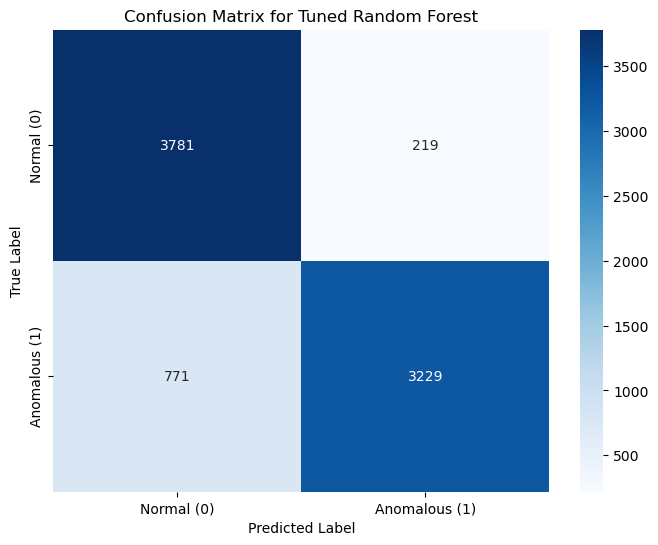

In [2]:

from sklearn.model_selection import GridSearchCV

print("\n" + "="*40)
print("     HYPERPARAMETER TUNING FOR RANDOM FOREST")
print("="*40)

rf_model = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 200],         # Number of trees in the forest
    'max_depth': [10, 20, None],        # Maximum depth of the tree
    'min_samples_leaf': [1, 2, 4],      # Minimum number of samples required at a leaf node
    'min_samples_split': [2, 5]         # Minimum number of samples required to split a node
}

# Set up the grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='recall', verbose=2)

print("Starting Grid Search... (This may take a few minutes)")
grid_search.fit(X_train, y_train)

print("\nBest parameters found by Grid Search:")
print(grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
print("\n--- Evaluating the Tuned Random Forest Model ---")
y_pred_tuned = best_rf_model.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
report_tuned = classification_report(y_test, y_pred_tuned)
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

print(f"Tuned Model Accuracy: {accuracy_tuned:.4f}")
print("\nTuned Model Classification Report:")
print(report_tuned)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal (0)', 'Anomalous (1)'], 
            yticklabels=['Normal (0)', 'Anomalous (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Tuned Random Forest')
plt.show()

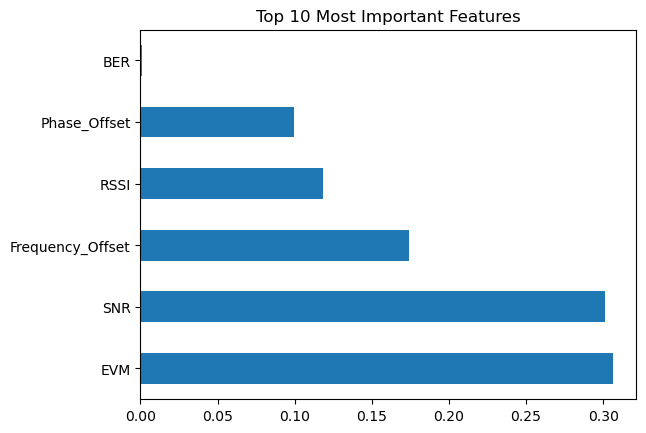

In [3]:
# Plot feature importances
feature_importances = pd.Series(best_rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Most Important Features")
plt.show()

In [ ]:
import joblib

joblib.dump(best_rf_model, 'evtol_anomaly_detector.pkl')
print("Model saved successfully!")

Model saved successfully!
